In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(rc={'figure.figsize': [9,9]}, font_scale=1.2)

In [2]:
df_08 = pd.read_csv("datasets/all_alpha_08.csv")
df_18 = pd.read_csv("datasets/all_alpha_18.csv")

# Assessing Dataset

In [11]:
#number of rows
'"df_08" has {} rows,"df_18" has {}.'.format(df_08.shape[0],df_18.shape[0])

'"df_08" has 2404 rows,"df_18" has 1611.'

In [12]:
#number of columns
'"df_08" has {} columns,"df_18" has {}.'.format(df_08.shape[1],df_18.shape[1])

'"df_08" has 18 columns,"df_18" has 18.'

In [15]:
#number of duplicates
'"df_08" has {} duplicate entries,"df_18" has {}.'.format(len(df_08) - len(df_08.drop_duplicates()),
                                                          len(df_18) - len(df_18.drop_duplicates()))

'"df_08" has 25 duplicate entries,"df_18" has 0.'

In [45]:
df_08.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6,Drv,15,20,17,22.0527,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT02.3DKR,SUV,7,Drv,17,22,19,24.1745,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT02.3DKR,SUV,6,Drv,17,22,19,24.1745,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXV03.5HKR,midsize car,7,Drv,16,24,19,24.5629,5,no


In [17]:
#info on 'df_08'
df_08.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2404 entries, 0 to 2403
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 2404 non-null   object 
 1   Displ                 2404 non-null   float64
 2   Cyl                   2205 non-null   object 
 3   Trans                 2205 non-null   object 
 4   Drive                 2311 non-null   object 
 5   Fuel                  2404 non-null   object 
 6   Sales Area            2404 non-null   object 
 7   Stnd                  2404 non-null   object 
 8   Underhood ID          2404 non-null   object 
 9   Veh Class             2404 non-null   object 
 10  Air Pollution Score   2404 non-null   object 
 11  FE Calc Appr          2205 non-null   object 
 12  City MPG              2205 non-null   object 
 13  Hwy MPG               2205 non-null   object 
 14  Cmb MPG               2205 non-null   object 
 15  Unadj Cmb MPG        

In [46]:
df_18.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
2,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
3,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
4,ACURA TLX,2.4,4.0,AMS-8,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,JHNXV02.4WH3,small car,3,23,33,27,6,No,330


In [51]:
type(df_18['City MPG'][0])

str

In [19]:
#info on 'df_18'
df_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1611 entries, 0 to 1610
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 1611 non-null   object 
 1   Displ                 1609 non-null   float64
 2   Cyl                   1609 non-null   float64
 3   Trans                 1611 non-null   object 
 4   Drive                 1611 non-null   object 
 5   Fuel                  1611 non-null   object 
 6   Cert Region           1611 non-null   object 
 7   Stnd                  1611 non-null   object 
 8   Stnd Description      1611 non-null   object 
 9   Underhood ID          1611 non-null   object 
 10  Veh Class             1611 non-null   object 
 11  Air Pollution Score   1611 non-null   int64  
 12  City MPG              1611 non-null   object 
 13  Hwy MPG               1611 non-null   object 
 14  Cmb MPG               1611 non-null   object 
 15  Greenhouse Gas Score 

In [25]:
#columns with missing values
print("Dataset 'df_08':",df_08.columns[df_08.isnull().any()].tolist())
print("Dataset 'df_18':",df_18.columns[df_18.isnull().any()].tolist())

Dataset 'df_08': ['Cyl', 'Trans', 'Drive', 'FE Calc Appr', 'City MPG', 'Hwy MPG', 'Cmb MPG', 'Unadj Cmb MPG', 'Greenhouse Gas Score']
Dataset 'df_18': ['Displ', 'Cyl']


In [27]:
#number of unique values in 'df_08'
df_08.nunique()

Model                   436
Displ                    47
Cyl                       8
Trans                    14
Drive                     2
Fuel                      5
Sales Area                3
Stnd                     12
Underhood ID            343
Veh Class                 9
Air Pollution Score      13
FE Calc Appr              2
City MPG                 39
Hwy MPG                  43
Cmb MPG                  38
Unadj Cmb MPG           721
Greenhouse Gas Score     20
SmartWay                  2
dtype: int64

In [28]:
#number of unique values in 'df_18'
df_18.nunique()

Model                   367
Displ                    36
Cyl                       7
Trans                    26
Drive                     2
Fuel                      5
Cert Region               2
Stnd                     19
Stnd Description         19
Underhood ID            230
Veh Class                 9
Air Pollution Score       6
City MPG                 58
Hwy MPG                  62
Cmb MPG                  57
Greenhouse Gas Score     10
SmartWay                  3
Comb CO2                299
dtype: int64

In [43]:
uniques = [df_08[column].unique() for column in df_08]
for i in range(0,len(uniques)):
    print(df_08.keys()[i],len(uniques[i]))

Model 436
Displ 47
Cyl 9
Trans 15
Drive 3
Fuel 5
Sales Area 3
Stnd 12
Underhood ID 343
Veh Class 9
Air Pollution Score 13
FE Calc Appr 3
City MPG 40
Hwy MPG 44
Cmb MPG 39
Unadj Cmb MPG 722
Greenhouse Gas Score 21
SmartWay 2


In [44]:
uniques = [df_18[column].unique() for column in df_18]
for i in range(0,len(uniques)):
    print(df_18.keys()[i],len(uniques[i]))

Model 367
Displ 37
Cyl 8
Trans 26
Drive 2
Fuel 5
Cert Region 2
Stnd 19
Stnd Description 19
Underhood ID 230
Veh Class 9
Air Pollution Score 6
City MPG 58
Hwy MPG 62
Cmb MPG 57
Greenhouse Gas Score 10
SmartWay 3
Comb CO2 299


In [54]:
df_08['Fuel'].unique()

array(['Gasoline', 'ethanol/gas', 'ethanol', 'diesel', 'CNG'],
      dtype=object)

In [55]:
df_18['Fuel'].unique()

array(['Gasoline', 'Gasoline/Electricity', 'Diesel', 'Ethanol/Gas',
       'Electricity'], dtype=object)

# Cleaning Column Labels

### Drop Extraneous Column 'Stnd', 'Underhood ID', 'FE Clac Appr' and 'Unadj Cmb MPG'

In [3]:
# drop columns from 2008 dataset
df_08.drop(['Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'], axis=1, inplace=True)



In [4]:
# confirm changes
df_08.keys()

Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Sales Area',
       'Veh Class', 'Air Pollution Score', 'City MPG', 'Hwy MPG', 'Cmb MPG',
       'Greenhouse Gas Score', 'SmartWay'],
      dtype='object')

In [5]:
df_08.shape

(2404, 14)

In [6]:
# drop columns from 2008 dataset
df_18.drop(['Stnd', 'Underhood ID',], axis=1, inplace=True)


In [7]:
# confirm changes
df_18.keys()

Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Cert Region',
       'Stnd Description', 'Veh Class', 'Air Pollution Score', 'City MPG',
       'Hwy MPG', 'Cmb MPG', 'Greenhouse Gas Score', 'SmartWay', 'Comb CO2'],
      dtype='object')

In [8]:
df_18.shape

(1611, 16)

### Rename 'Sales Area' to 'Cert Region'

In [9]:
# rename Sales Area to Cert Region
df_08.rename(columns={'Sales Area':'Cert Region'},inplace=True)

In [10]:
# confirm changes
df_18.keys()

Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Cert Region',
       'Stnd Description', 'Veh Class', 'Air Pollution Score', 'City MPG',
       'Hwy MPG', 'Cmb MPG', 'Greenhouse Gas Score', 'SmartWay', 'Comb CO2'],
      dtype='object')

### replace spaces with underscores and lowercase labels for 2008 dataset

In [11]:
# replace spaces with underscores and lowercase labels for 2008 dataset
df_08.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

In [12]:
# confirm changes
df_08.keys()

Index(['model', 'displ', 'cyl', 'trans', 'drive', 'fuel', 'cert_region',
       'veh_class', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg',
       'greenhouse_gas_score', 'smartway'],
      dtype='object')

In [13]:
# replace spaces with underscores and lowercase labels for 2018 dataset
df_18.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

In [14]:
# confirm changes
df_18.keys()

Index(['model', 'displ', 'cyl', 'trans', 'drive', 'fuel', 'cert_region',
       'stnd_description', 'veh_class', 'air_pollution_score', 'city_mpg',
       'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score', 'smartway', 'comb_co2'],
      dtype='object')

### Drop missed Columns

In [15]:
df_18.drop(columns='stnd_description',inplace=True)

In [16]:
df_18.drop(columns='comb_co2',inplace=True)

### Confirm identical Columns

In [17]:
# confirm column labels for 2008 and 2018 datasets are identical
(df_08.columns == df_18.columns).all()

True

In [18]:
# save new datasets (checkpoint)
df_08.to_csv('datasets/data_08_v1.csv', index=False)
df_18.to_csv('datasets/data_18_v1.csv', index=False)

# Filter, Drop Nulls, Dedupe

In [30]:
#load checkpoint 
df_08 = pd.read_csv("datasets/data_08_v1.csv")
df_18 = pd.read_csv("datasets/data_18_v1.csv")

In [31]:
df_08.head()

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,SUV,6,15,20,17,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,17,22,19,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,SUV,6,17,22,19,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,midsize car,7,16,24,19,5,no


In [32]:
df_08.shape,df_18.shape

((2404, 14), (1611, 14))

### for consistency, we will only compare cars certified by California standards

In [33]:
df_08 = df_08[ df_08['cert_region'] == 'CA']
df_18 = df_18[ df_18['cert_region'] == 'CA']

In [34]:
print(df_08['cert_region'].unique(),df_18['cert_region'].unique())
print(df_08.shape,df_18.shape)

['CA'] ['CA']
(1084, 14) (798, 14)


In [38]:
#Drop cert_region column as it's useless at this point (all 'CA')
df_08.drop('cert_region',axis = 1,inplace=True)
df_18.drop('cert_region',axis = 1,inplace=True)

In [39]:
print(df_08.shape,df_18.shape)

(1084, 13) (798, 13)


# Drop Missing Value Rows

### Counting missing values

In [43]:
df_08.isnull().sum()

model                    0
displ                    0
cyl                     75
trans                   75
drive                   37
fuel                     0
veh_class                0
air_pollution_score      0
city_mpg                75
hwy_mpg                 75
cmb_mpg                 75
greenhouse_gas_score    75
smartway                 0
dtype: int64

In [44]:
df_18.isnull().sum()

model                   0
displ                   1
cyl                     1
trans                   0
drive                   0
fuel                    0
veh_class               0
air_pollution_score     0
city_mpg                0
hwy_mpg                 0
cmb_mpg                 0
greenhouse_gas_score    0
smartway                0
dtype: int64

In [46]:
#drop any row with null 
df_08.dropna(inplace=True)
df_18.dropna(inplace=True)

In [47]:
print(df_08.shape,df_18.shape)

(1009, 13) (797, 13)


In [53]:
df_08.isnull().sum().sum() + df_18.isnull().sum().sum()

0

# Remove Duplicates

In [57]:
df_08.duplicated().sum(),df_18.duplicated().sum()

(23, 3)

In [58]:
df_08.drop_duplicates(inplace=True),df_18.drop_duplicates(inplace=True)

(None, None)

In [59]:
#check
df_08.duplicated().sum(),df_18.duplicated().sum()

(0, 0)

In [60]:
# save new datasets (checkpoint)
df_08.to_csv('datasets/data_08_v2.csv', index=False)
df_18.to_csv('datasets/data_18_v2.csv', index=False)

# Inspecting Dataset Datatypes

In [2]:
#load checkpoint 
df_08 = pd.read_csv("datasets/data_08_v2.csv")
df_18 = pd.read_csv("datasets/data_18_v2.csv")

In [3]:
df_08.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,SUV,7,15,20,17,4,no
1,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,SUV,7,17,22,19,5,no
2,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,midsize car,7,16,24,19,5,no
3,ACURA TL,3.2,(6 cyl),Auto-S5,2WD,Gasoline,midsize car,7,18,26,21,6,yes
4,ACURA TL,3.5,(6 cyl),Auto-S5,2WD,Gasoline,midsize car,7,17,26,20,6,yes


In [4]:
df_18.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,small SUV,3,20,28,23,5,No
1,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,small SUV,3,19,27,22,4,No
2,ACURA TLX,2.4,4.0,AMS-8,2WD,Gasoline,small car,3,23,33,27,6,No
3,ACURA TLX,3.5,6.0,SemiAuto-9,2WD,Gasoline,small car,3,20,32,24,5,No
4,ACURA TLX,3.5,6.0,SemiAuto-9,4WD,Gasoline,small car,3,21,30,24,5,No


In [5]:
df_08.info(),df_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model                 986 non-null    object 
 1   displ                 986 non-null    float64
 2   cyl                   986 non-null    object 
 3   trans                 986 non-null    object 
 4   drive                 986 non-null    object 
 5   fuel                  986 non-null    object 
 6   veh_class             986 non-null    object 
 7   air_pollution_score   986 non-null    object 
 8   city_mpg              986 non-null    object 
 9   hwy_mpg               986 non-null    object 
 10  cmb_mpg               986 non-null    object 
 11  greenhouse_gas_score  986 non-null    object 
 12  smartway              986 non-null    object 
dtypes: float64(1), object(12)
memory usage: 100.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794 entries, 0 to 793
Dat

(None, None)

### Datatypes that need to be fixed

cyl datatype
2008: extract int from string.
2018: convert float to int.
    
air_pollution_score datatype
2008: convert string to float.
2018: convert int to float.
    
city_mpg, hwy_mpg, cmb_mpg datatypes
2008 and 2018: convert string to float.
    
greenhouse_gas_score datatype
2008: convert from float to int.

In [6]:
#value counts for the 2008 cyl column
df_08['cyl'].value_counts()

(6 cyl)     409
(4 cyl)     283
(8 cyl)     199
(5 cyl)      48
(12 cyl)     30
(10 cyl)     14
(2 cyl)       2
(16 cyl)      1
Name: cyl, dtype: int64

In [7]:
#in the 2008 cyl column, int from strings 
df_08['cyl'] = df_08['cyl'].apply(lambda x : int(x[1:-4]))

In [8]:
df_08['cyl'].value_counts()

6     409
4     283
8     199
5      48
12     30
10     14
2       2
16      1
Name: cyl, dtype: int64

In [9]:
# in the 2018 cyl column, int from float
df_18['cyl'] = df_18['cyl'].apply(lambda x : int(x))

In [10]:
df_18['cyl'].value_counts()

4     365
6     246
8     153
3      18
12      9
5       2
16      1
Name: cyl, dtype: int64

In [11]:
#air_pollution_score to float
pd.to_numeric(df_08.air_pollution_score)

ValueError: Unable to parse string "6/4" at position 582

<font color = 'blue'> 6/7 ? lets investigate further

In [12]:
df_08[df_08.air_pollution_score == '6/4']

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


#### The mpg columns and greenhouse gas scores also seem to have the same problem
#### According to this link, which I found from the PDF documentation:

http://www.fueleconomy.gov/feg/findacarhelp.shtml#airPollutionScore

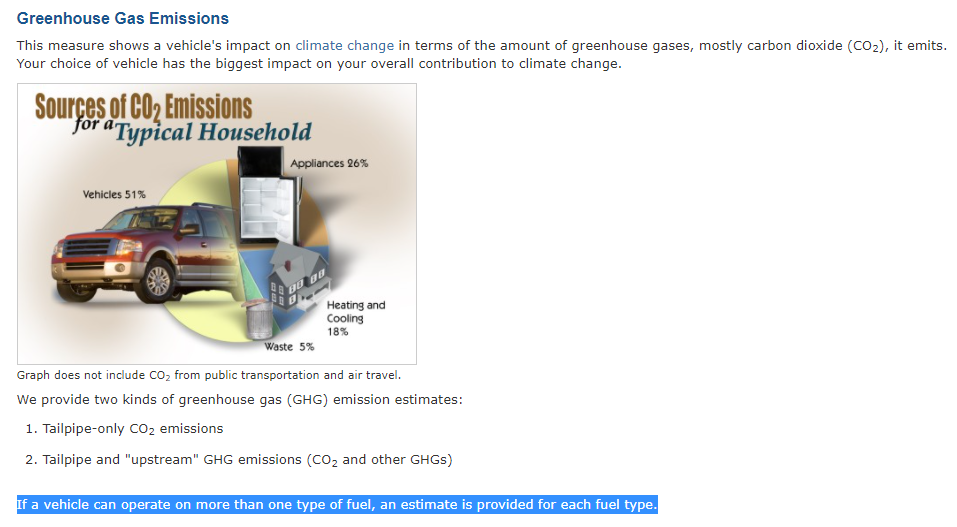

<font color = 'green'> "If a vehicle can operate on more than one type of fuel, an estimate is provided for each fuel type." </font>

# Split each hybrid entry into two seperate entries 

In [14]:
#filter hybrids
hb_08 = df_08[df_08['fuel'].str.contains('/')]

hb_08.append(hb_08).info() # display all hybrids

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 582 to 582
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model                 2 non-null      object 
 1   displ                 2 non-null      float64
 2   cyl                   2 non-null      int64  
 3   trans                 2 non-null      object 
 4   drive                 2 non-null      object 
 5   fuel                  2 non-null      object 
 6   veh_class             2 non-null      object 
 7   air_pollution_score   2 non-null      object 
 8   city_mpg              2 non-null      object 
 9   hwy_mpg               2 non-null      object 
 10  cmb_mpg               2 non-null      object 
 11  greenhouse_gas_score  2 non-null      object 
 12  smartway              2 non-null      object 
dtypes: float64(1), int64(1), object(11)
memory usage: 224.0+ bytes


In [15]:
# create two copies of the 2008 hybrids dataframe
df1 = hb_08.copy()  # data on first fuel type of each hybrid vehicle
df2 = hb_08.copy()  # data on second fuel type of each hybrid vehicle

In [16]:
# columns to split by "/"
split_columns = ['fuel', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']

# apply split function to each column of each dataframe copy
for col in split_columns:
    df1[col] = df1[col].apply(lambda x: x.split("/")[0])
    df2[col] = df2[col].apply(lambda x: x.split("/")[1])

In [17]:
df1.iloc[[0]]

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no


In [18]:
df2.iloc[[0]]

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [19]:
#drop original hybrid rows
df_08.drop(hb_08.index,inplace=True)
df_08

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7,15,20,17,4,no
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7,17,22,19,5,no
2,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,midsize car,7,16,24,19,5,no
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7,18,26,21,6,yes
4,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7,17,26,20,6,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,VOLVO V70,3.2,6,Auto-S6,2WD,Gasoline,station wagon,7,16,24,19,5,no
982,VOLVO XC 70,3.2,6,Auto-S6,4WD,Gasoline,SUV,7,15,22,17,4,no
983,VOLVO XC 90,3.2,6,Auto-S6,2WD,Gasoline,SUV,7,14,20,16,4,no
984,VOLVO XC 90,3.2,6,Auto-S6,4WD,Gasoline,SUV,7,14,20,16,4,no


In [20]:
new_hb = df1.append(df2)

In [21]:
df_08 = df_08.append(new_hb,ignore_index=True)

In [22]:
df_08[ df_08['fuel'].str.contains('/')] #make sure none contain '/'

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


In [23]:
df_08.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7,15,20,17,4,no
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7,17,22,19,5,no
2,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,midsize car,7,16,24,19,5,no
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7,18,26,21,6,yes
4,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7,17,26,20,6,yes


In [24]:
#repeat for 2018

#filter hybrids
hb_18 = df_18[df_18['fuel'].str.contains('/')]

In [25]:
# create two copies of the 2008 hybrids dataframe
df1 = hb_18.copy()  # data on first fuel type of each hybrid vehicle
df2 = hb_18.copy()  # data on second fuel type of each hybrid vehicle

In [26]:
#drop original hybrid rows
df_18.drop(hb_18.index,inplace=True)
df_18[ df_18['fuel'].str.contains('/')] #make sure none contain '/'

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


In [27]:
split_columns = ['fuel','city_mpg','hwy_mpg','cmb_mpg']
# apply split function to each column of each dataframe copy
for col in split_columns:
    df1[col] = df1[col].apply(lambda x: x.split("/")[0])
    df2[col] = df2[col].apply(lambda x: x.split("/")[1])

In [28]:
new_hb = df1.append(df2)

In [29]:
df_18 = df_18.append(new_hb,ignore_index=True)

In [30]:
df_18[ df_18['fuel'].str.contains('/')] #make sure none contain '/'

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


# continue the changes needed for air_pollution_score:¶
2008: convert string to float <br>
2018: convert int to float

In [32]:
df_08['air_pollution_score'] = df_08['air_pollution_score'].astype(float)

In [33]:
df_18['air_pollution_score'] = df_18['air_pollution_score'].astype(float)

In [34]:
#save checkpoint
df_08.to_csv('datasets/tadata_08_v3.csv', index=False)
df_18.to_csv('datasets/data_18_v3.csv', index=False)

### city_mpg, hwy_mpg, cmb_mpg datatypes
2008 and 2018: convert string to float.

In [44]:
df_08['city_mpg'] = df_08['city_mpg'].astype(float)

In [45]:
df_18['city_mpg'] = df_18['city_mpg'].astype(float)

In [46]:
df_08['hwy_mpg'],df_18['hwy_mpg'] = df_08['hwy_mpg'].astype(float),df_18['hwy_mpg'].astype(float)

In [49]:
df_08['cmb_mpg'],df_18['cmb_mpg'] = df_08['cmb_mpg'].astype(float),df_18['cmb_mpg'].astype(float) 

### greenhouse_gas_score datatype
2008: convert from float to int.

In [53]:
df_08['greenhouse_gas_score'] = df_08['greenhouse_gas_score'].astype(int)

In [56]:
df_08.dtypes, df_18.dtypes

(model                    object
 displ                   float64
 cyl                       int64
 trans                    object
 drive                    object
 fuel                     object
 veh_class                object
 air_pollution_score     float64
 city_mpg                float64
 hwy_mpg                 float64
 cmb_mpg                 float64
 greenhouse_gas_score      int32
 smartway                 object
 dtype: object,
 model                    object
 displ                   float64
 cyl                       int64
 trans                    object
 drive                    object
 fuel                     object
 veh_class                object
 air_pollution_score     float64
 city_mpg                float64
 hwy_mpg                 float64
 cmb_mpg                 float64
 greenhouse_gas_score      int64
 smartway                 object
 dtype: object)

In [57]:
# Save CLEAN datasets as
df_08.to_csv('datasets/clean_08.csv', index=False)
df_18.to_csv('datasets/clean_18.csv', index=False)

# Exploring with Visuals

In [3]:
#load Datasets
df_08 = pd.read_csv("datasets/clean_08.csv")
df_18 = pd.read_csv("datasets/clean_18.csv")

### Comparing greenhouse gas score

In [10]:
df_08['greenhouse_gas_score'].value_counts()

6     279
5     166
7     163
4     114
3      82
8      66
2      64
0      25
1      16
9      10
10      2
Name: greenhouse_gas_score, dtype: int64

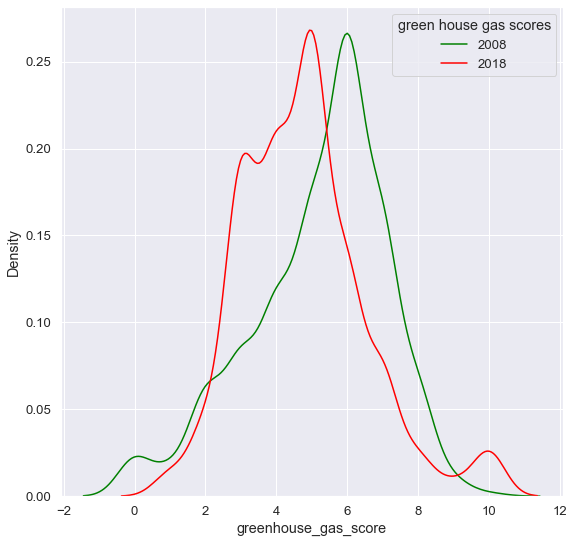

In [23]:
sns.kdeplot(x='greenhouse_gas_score',data=df_08,color='green');
sns.kdeplot(x='greenhouse_gas_score',data=df_18,color='red');
plt.legend(['2008','2018'],title="green house gas scores",loc = 'upper right');
# plt.legend

In [24]:
df_08.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,19.0,5,no
2,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,midsize car,7.0,16.0,24.0,19.0,5,no
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18.0,26.0,21.0,6,yes
4,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7.0,17.0,26.0,20.0,6,yes


<font color = 'blue'> 2008 green house gas scores are more skewed to the left, highlighting a higher average score</font>

### comparing overall mpg changes (city_mpg,hwy_mpg and cmb_mpg)

In [25]:
df_08['avg_mpg'],df_18['avg_mpg'] = df_08['city_mpg'] + df_08['hwy_mpg'] + df_08['cmb_mpg'] / 3, df_18['city_mpg'] + df_18['hwy_mpg'] + df_18['cmb_mpg'] / 3 

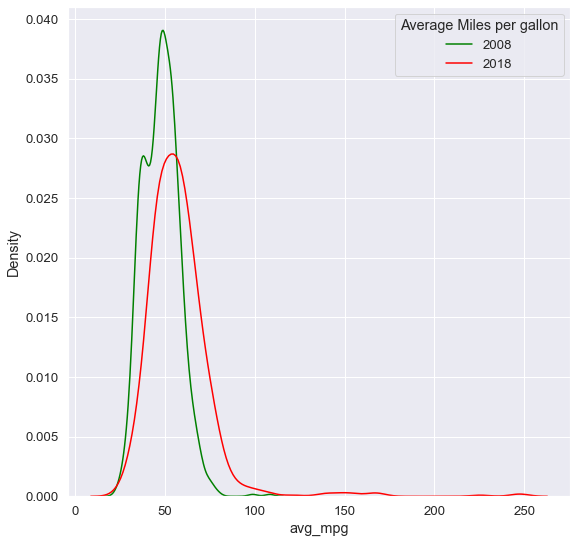

In [37]:
sns.kdeplot(x='avg_mpg',data=df_08,color='green');
sns.kdeplot(x='avg_mpg',data=df_18,color='red');
plt.legend(['2008','2018'],title="Average Miles per gallon",loc = 'upper right');
# plt.xlim([0,140]);

<font color = 'blue'>Note: average miles per gallon for '2018' is more right skewed than '2008'</font>

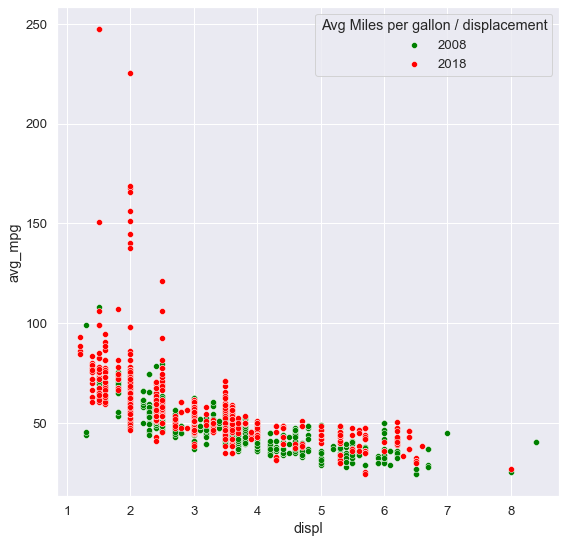

In [46]:
sns.scatterplot(x='displ',y='avg_mpg',color = 'green',data=df_08);
sns.scatterplot(x='displ',y='avg_mpg',color = 'red',data=df_18);
plt.legend(['2008','2018'],title="Avg Miles per gallon / displacement",loc = 'upper right');

<font color = 'blue'>Note: Negative correlation between 'Average miles per gallon' and 'displacement'</font>

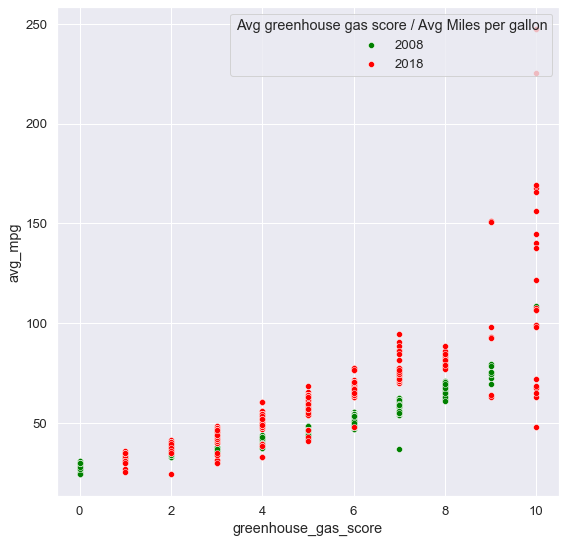

In [49]:
sns.scatterplot(x='greenhouse_gas_score',y='avg_mpg',color = 'green',data=df_08);
sns.scatterplot(x='greenhouse_gas_score',y='avg_mpg',color = 'red',data=df_18);
plt.legend(['2008','2018'],title="Avg greenhouse gas score / Avg Miles per gallon",loc = 'upper right');

<font color = 'blue'> Note: Positive correlation between 'Greenhouse gas score' and 'miles per gallon'</font>

# Drawing Conclusions

In [5]:
df_08 = pd.read_csv("datasets/clean_08.csv")
df_18 = pd.read_csv("datasets/clean_18.csv")

In [6]:
df_08.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,19.0,5,no
2,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,midsize car,7.0,16.0,24.0,19.0,5,no
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18.0,26.0,21.0,6,yes
4,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7.0,17.0,26.0,20.0,6,yes


### Q1: Are more unique models using alternative sources of fuel? By how much?

In [9]:
df_08.model.value_counts()

NISSAN Altima          12
HONDA Accord           11
FORD Ranger            10
DODGE RAM 1500          9
DODGE Dakota            8
                       ..
MERCEDES-BENZ SL550     1
TOYOTA Prius            1
MERCEDES-BENZ S600      1
KIA Sedona              1
ACURA RL                1
Name: model, Length: 377, dtype: int64

First step is to define 'alternative sources of fuel' relative to our data. <br><a link href='https://www.epa.gov/renewable-fuel-standard-program/alternative-fuels#:~:text=Alternative%20fuels%20include%20gaseous%20fuels,%2Dderived%20oils%3B%20and%20electricity.'>source</a>
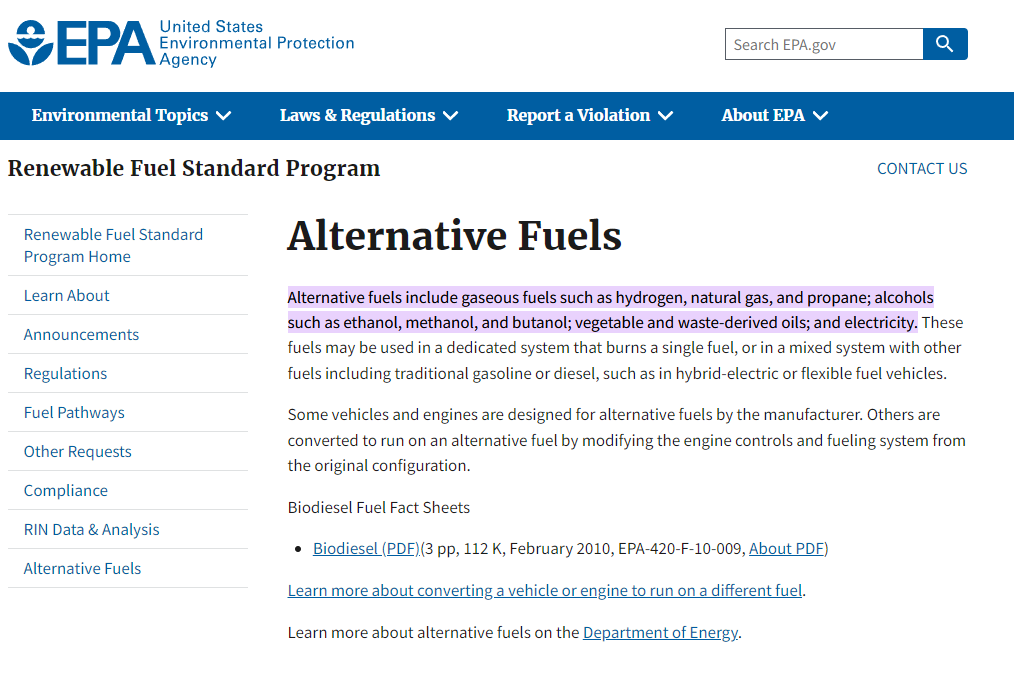
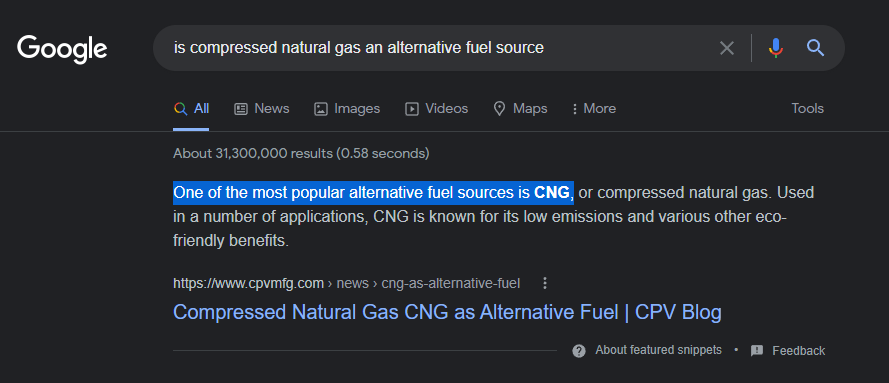

identify alternative fuel sources in data 

In [26]:
df_08.fuel.unique() #alt = CNG ethanol gas

array(['Gasoline', 'CNG', 'ethanol', 'gas'], dtype=object)

In [28]:
df_18.fuel.unique() #alt = Ethanol Electricity Gas

array(['Gasoline', 'Diesel', 'Ethanol', 'Electricity', 'Gas'],
      dtype=object)

filter out alternative data

In [29]:
alt_df_08 = df_08.query('fuel in ["CNG","ethanol","gas"]')
alt_df_18 = df_18.query('fuel in ["Ethanol","Electricity","Gas"]')

In [33]:
unique_alternative_models_08 = alt_df_08.model.nunique()
unique_alternative_models_08

2

In [34]:
unique_alternative_models_18 = alt_df_18.model.nunique()
unique_alternative_models_18

26

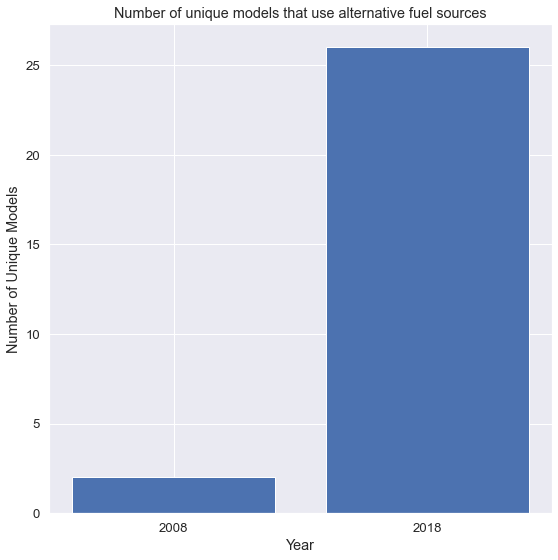

In [38]:
plt.bar(['2008','2018'],[unique_alternative_models_08,unique_alternative_models_18])
plt.title("Number of unique models that use alternative fuel sources")
plt.xlabel("Year")
plt.ylabel("Number of Unique Models");

<font color = 'blue'>Note: number of unique models using alternative fuel sources increased from 2 in 2008, to 26 in 2018</font>

we can also check the Percentage

In [42]:
unique_models_08 = df_08.model.nunique()
unique_models_08

377

In [45]:
unique_models_18 = df_18.model.nunique()
unique_models_18

357

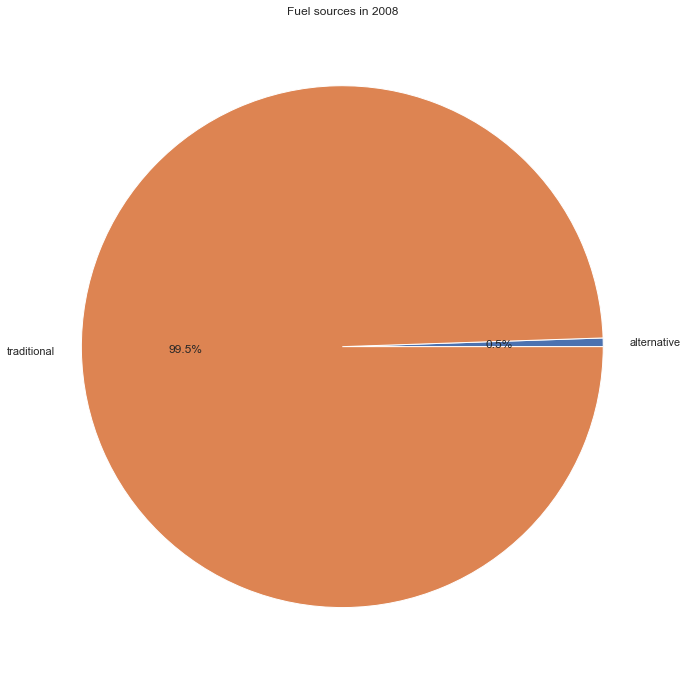

In [59]:
plt.pie([unique_alternative_models_08,unique_models_08 - unique_alternative_models_08],labels=['alternative','traditional'],autopct='%.1f%%')
plt.title("Fuel sources in 2008");

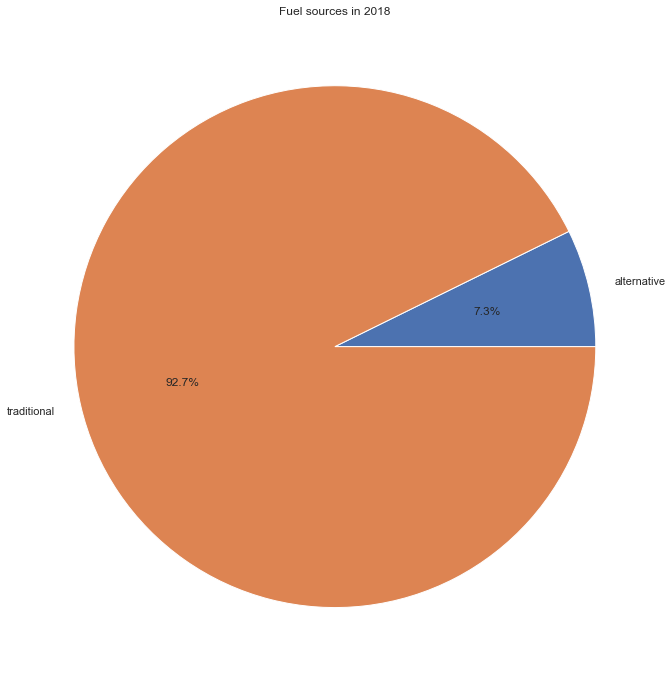

In [60]:
plt.pie([unique_alternative_models_18,unique_models_18 - unique_alternative_models_18],labels=['alternative','traditional'],autopct='%.1f%%')
plt.title("Fuel sources in 2018");

<font color = 'blue'>Alternative fuel sources models increased from 0.5% in 2008, to 7.3% in 2018</font> 

### Q2: How much have vehicle classes improved in fuel economy?  

average fuel mpg of each class in 2008

In [74]:
veh_class_avg_mpg_08 = df_08.groupby('veh_class')[['city_mpg','hwy_mpg','cmb_mpg']].mean()
veh_class_avg_mpg_08

,city_mpg,hwy_mpg,cmb_mpg
veh_class,,,
SUV,16.507143,21.935714,18.471429
large car,15.836364,23.345455,18.509091
midsize car,18.826087,26.565217,21.601449
minivan,16.882353,23.705882,19.117647
pickup,14.578313,19.204819,16.277108
small car,18.372372,25.963964,21.105105
station wagon,19.633333,27.116667,22.366667
van,13.142857,17.333333,14.952381


In [75]:
avg_mpg_08 = veh_class_avg_mpg_08['city_mpg'] + veh_class_avg_mpg_08['hwy_mpg'] + veh_class_avg_mpg_08['cmb_mpg'] / 3
avg_mpg_08

veh_class
SUV              44.600000
large car        45.351515
midsize car      52.591787
minivan          46.960784
pickup           39.208835
small car        51.371371
station wagon    54.205556
van              35.460317
dtype: float64

average fuel mpg of each class in 2018

In [76]:
veh_class_avg_mpg_18 = df_18.groupby('veh_class')[['city_mpg','hwy_mpg','cmb_mpg']].mean()
veh_class_avg_mpg_18

,city_mpg,hwy_mpg,cmb_mpg
veh_class,,,
large car,20.420455,28.795455,23.409091
midsize car,24.862319,33.057971,27.884058
minivan,18.000000,25.400000,20.800000
pickup,16.551282,22.012821,18.589744
small SUV,21.666667,27.879630,24.074074
small car,22.561404,30.435088,25.421053
special purpose,16.600000,21.300000,18.500000
standard SUV,16.011628,21.953488,18.197674
station wagon,24.705882,32.058824,27.529412


In [77]:
avg_mpg_18 = veh_class_avg_mpg_18['city_mpg'] + veh_class_avg_mpg_18['hwy_mpg'] + veh_class_avg_mpg_18['cmb_mpg'] / 3
avg_mpg_18

veh_class
large car          57.018939
midsize car        67.214976
minivan            50.333333
pickup             44.760684
small SUV          57.570988
small car          61.470175
special purpose    44.066667
standard SUV       44.031008
station wagon      65.941176
dtype: float64

difference between 2008 and 2018 in mpg

In [80]:
improvements_in_fuel_econ = avg_mpg_18 - avg_mpg_08
improvements_in_fuel_econ.dropna(inplace=True) #remove null values
improvements_in_fuel_econ

veh_class
large car        11.667424
midsize car      14.623188
minivan           3.372549
pickup            5.551848
small car        10.098804
station wagon    11.735621
dtype: float64

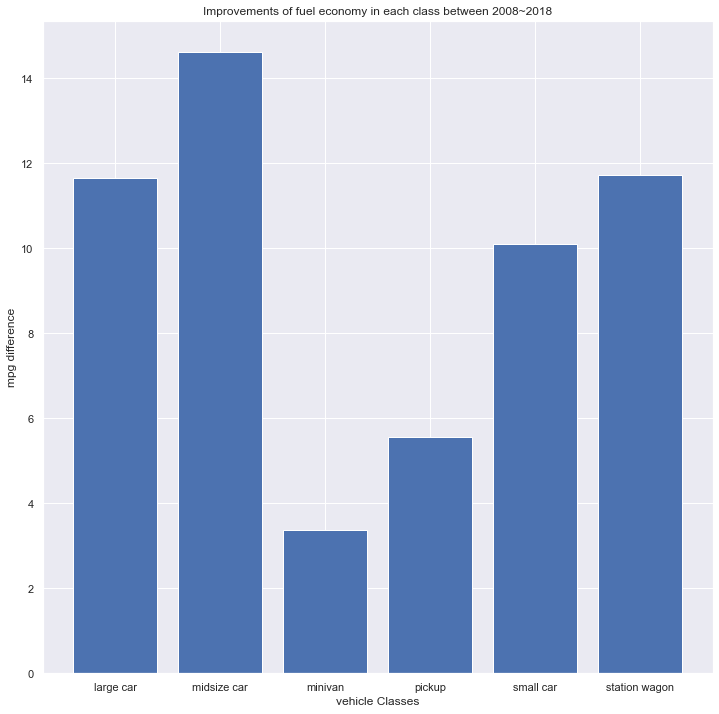

In [99]:
plt.bar(improvements_in_fuel_econ.index,improvements_in_fuel_econ.values)
plt.title("Improvements of fuel economy in each class between 2008~2018")
plt.xlabel("vehicle Classes")
plt.ylabel("mpg difference");

### Q3: What are the characteristics of SmartWay vehicles? Have they changed over time?

In [4]:
df_08.smartway.unique()

array(['no', 'yes'], dtype=object)

In [5]:
df_18.smartway.unique()

array(['No', 'Yes', 'Elite'], dtype=object)

In [7]:
df_08['year'] = 2008
df_18['year'] = 2018

In [8]:
df_08_smartway = df_08.query('smartway in ["yes"]').copy()
df_18_smartway = df_18.query('smartway in ["Yes","Elite"]').copy()
df_08_nonsmart = df_08.query('smartway in ["no"]').copy()
df_18_nonsmart = df_18.query('smartway in ["No"]').copy()

In [9]:
df_smartway = [df_08_smartway,df_18_smartway]
df_nonsmart = [df_08_nonsmart,df_18_nonsmart]
df_smartway = pd.concat(df_smartway)
df_nonsmart = pd.concat(df_nonsmart)

In [10]:
df_smartway['smartway'] = 'smart'
df_nonsmart['smartway'] = 'non_smart'

In [11]:
df = [df_smartway.copy(),df_nonsmart.copy()]
df = pd.concat(df,ignore_index=True)

In [19]:
df['avg_mpg'] = df['city_mpg'] + df['hwy_mpg'] + df['cmb_mpg'] / 3

In [20]:
df.describe()

,Unnamed: 0,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,year,avg_mpg
count,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000,1819.000000
mean,909.000000,3.305333,5.778450,5.460143,19.198461,26.136339,21.728422,4.992303,2012.573942,52.577607
std,525.244388,1.313202,1.831715,1.968378,6.938412,7.005349,6.867753,1.851454,4.983184,16.018844
min,0.000000,1.200000,2.000000,1.000000,8.000000,12.000000,10.000000,0.000000,2008.000000,24.333333
25%,454.500000,2.300000,4.000000,3.000000,16.000000,22.000000,18.000000,4.000000,2008.000000,44.000000
50%,909.000000,3.000000,6.000000,6.000000,18.000000,25.000000,21.000000,5.000000,2008.000000,51.000000
75%,1363.500000,4.000000,6.000000,7.000000,21.000000,29.000000,24.000000,6.000000,2018.000000,59.000000
max,1818.000000,8.400000,16.000000,9.500000,113.000000,99.000000,106.000000,10.000000,2018.000000,247.333333


In [33]:
df.to_csv("datasets/all_data.csv",index=False) #save backup

In [22]:
df = pd.read_csv("datasets/all_data.csv") #load data

In [15]:
df.displ

0       3.2
1       3.5
2       3.5
3       2.4
4       2.0
       ... 
1814    2.0
1815    2.0
1816    3.5
1817    5.7
1818    5.7
Name: displ, Length: 1819, dtype: float64

<AxesSubplot:xlabel='displ', ylabel='Density'>

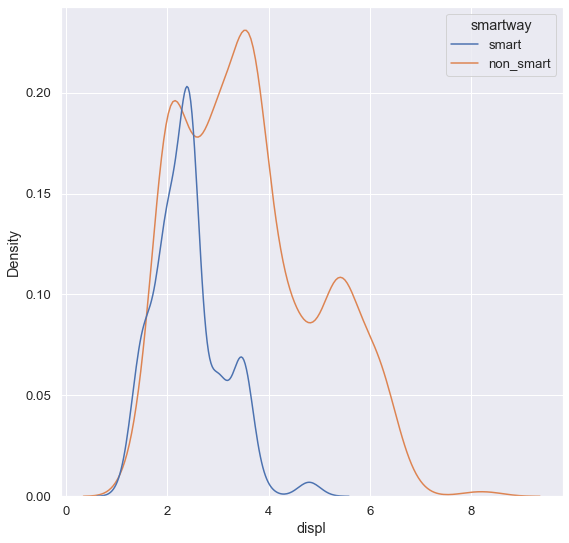

In [23]:
sns.kdeplot(x='displ', hue ='smartway',data=df)

<font color = 'blue'>Note: smartway cars tend to have less engine displacement</font>

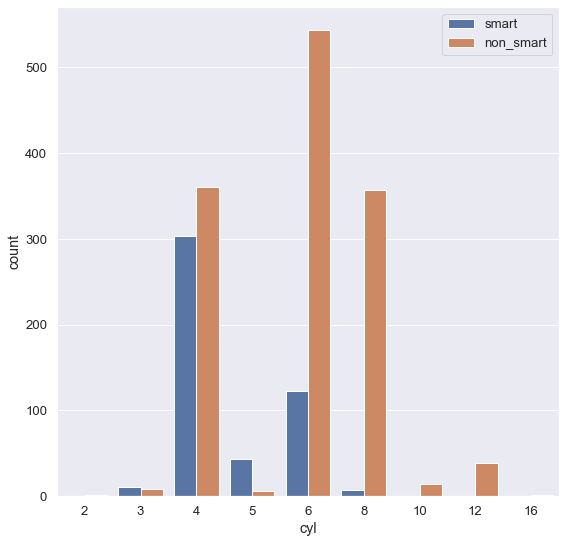

In [45]:
sns.countplot(x='cyl', hue ='smartway',data=df)
plt.legend(loc = 'upper right')

<font color = 'blue'>Note: smart cars tend to have less cylinders</font>

<AxesSubplot:xlabel='air_pollution_score', ylabel='count'>

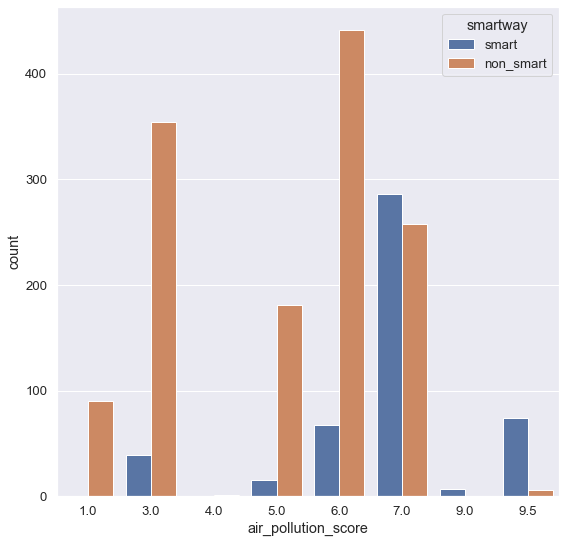

In [48]:
sns.countplot(x='air_pollution_score', hue ='smartway',data=df)

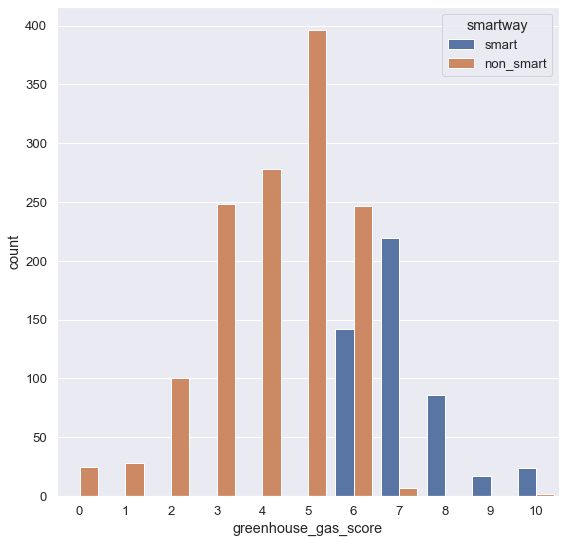

In [17]:
sns.countplot(x='greenhouse_gas_score', hue ='smartway',data=df);

<font color = 'blue'>Note: Smartway cars have an overall higher average air/gas pollution score</font>

In [150]:
df_smartway.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,year
count,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000
mean,2.422541,4.629098,6.889344,24.065574,31.303279,26.752049,7.102459,2010.213115
std,0.673603,0.978062,1.592800,10.100715,8.630579,9.369332,1.020204,4.155557
min,1.200000,3.000000,3.000000,17.000000,22.000000,20.000000,6.000000,2008.000000
25%,2.000000,4.000000,7.000000,19.000000,27.000000,22.000000,6.000000,2008.000000
50%,2.400000,4.000000,7.000000,21.000000,29.000000,24.000000,7.000000,2008.000000
75%,2.700000,6.000000,7.000000,27.000000,33.000000,29.000000,8.000000,2008.000000
max,5.000000,8.000000,9.500000,113.000000,99.000000,106.000000,10.000000,2018.000000


In [151]:
df_nonsmart.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,year
count,1331.000000,1331.000000,1331.000000,1331.000000,1331.000000,1331.000000,1331.000000,1331.000000
mean,3.629001,6.199850,4.936138,17.413974,24.241923,19.886551,4.218633,2013.439519
std,1.341759,1.890387,1.828363,4.070516,5.140002,4.435492,1.439345,4.982517
min,1.300000,2.000000,1.000000,8.000000,12.000000,10.000000,0.000000,2008.000000
25%,2.500000,4.000000,3.000000,15.000000,20.000000,17.000000,3.000000,2008.000000
50%,3.500000,6.000000,6.000000,17.000000,24.000000,19.000000,4.000000,2018.000000
75%,4.600000,8.000000,6.000000,20.000000,28.000000,23.000000,5.000000,2018.000000
max,8.400000,16.000000,9.500000,59.000000,61.000000,60.000000,10.000000,2018.000000


### Q4: What features are associated with better fuel economy?

In [32]:
df.head()

,Unnamed: 0,Unnamed: 0.1,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway,year,avg_mpg
0,0,0,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18.0,26.0,21.0,6,smart,2008,51.000000
1,1,1,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7.0,17.0,26.0,20.0,6,smart,2008,49.666667
2,2,2,ACURA TL,3.5,6,Man-6,2WD,Gasoline,midsize car,7.0,18.0,27.0,21.0,6,smart,2008,52.000000
3,3,3,ACURA TSX,2.4,4,Auto-S5,2WD,Gasoline,small car,6.0,20.0,28.0,23.0,7,smart,2008,55.666667
4,4,4,AUDI A3,2.0,4,Man-6,2WD,Gasoline,station wagon,7.0,21.0,29.0,24.0,7,smart,2008,58.000000


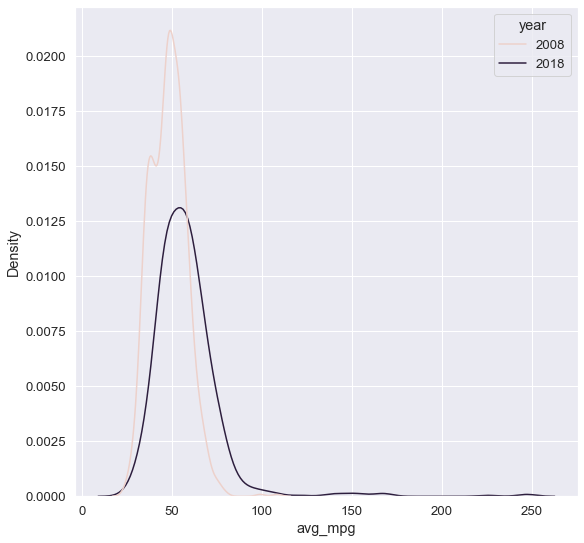

In [31]:
sns.kdeplot(x='avg_mpg', hue ='year',data=df);

<font color = 'blue'>Note: newer cars have a higher average miles per gallon</font>

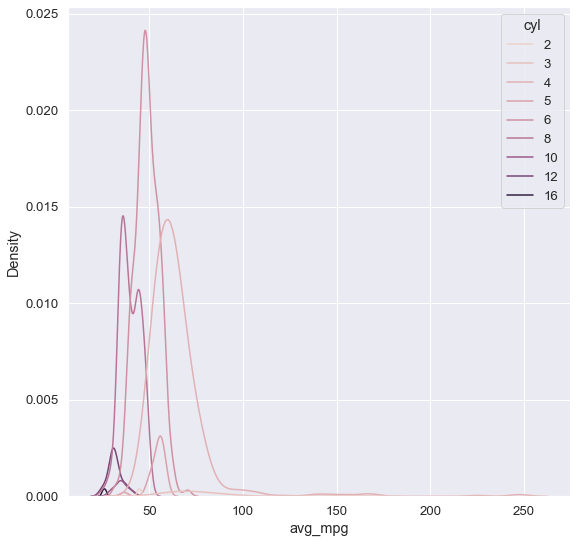

In [35]:
sns.kdeplot(x='avg_mpg', hue ='cyl',data=df);

<font color = 'blue'>Note: cars with more cylinders have a higher mile per hour efficiency </font>

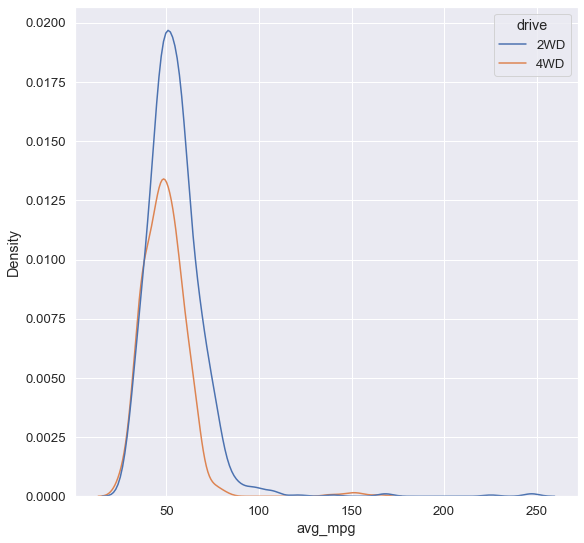

In [40]:
sns.kdeplot(x='avg_mpg', hue ='drive',data=df);

In [ ]:
sns.kdeplot(x='avg_mpg', hue ='drive',data=df);

In [27]:
df.corr()['avg_mpg']

Unnamed: 0             -0.134071
Unnamed: 0.1           -0.134071
displ                  -0.647633
cyl                    -0.611817
air_pollution_score     0.015358
city_mpg                0.985941
hwy_mpg                 0.983972
cmb_mpg                 0.998103
greenhouse_gas_score    0.727884
year                    0.309931
avg_mpg                 1.000000
Name: avg_mpg, dtype: float64

# Merging datasets

In [4]:
df_08 = pd.read_csv("datasets/clean_08.csv") #loading backup files
df_18 = pd.read_csv("datasets/clean_18.csv")

In [16]:
df_08.rename(columns= lambda x: x.strip() + "_2008",inplace=True)

In [17]:
df_18.rename(columns= lambda x: x.strip() + "_2018", inplace= True)

In [24]:
df_combined = df_08.merge(df_18, left_on='model_2008',right_on='model_2018',how='inner')
df_combined.head()

,model_2008,displ_2008,cyl_2008,trans_2008,drive_2008,fuel_2008,veh_class_2008,air_pollution_score_2008,city_mpg_2008,hwy_mpg_2008,...,trans_2018,drive_2018,fuel_2018,veh_class_2018,air_pollution_score_2018,city_mpg_2018,hwy_mpg_2018,cmb_mpg_2018,greenhouse_gas_score_2018,smartway_2018
0,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,...,SemiAuto-6,2WD,Gasoline,small SUV,3.0,20.0,28.0,23.0,5,No
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,...,SemiAuto-6,4WD,Gasoline,small SUV,3.0,19.0,27.0,22.0,4,No
2,AUDI A3,2.0,4,Man-6,2WD,Gasoline,station wagon,7.0,21.0,29.0,...,AMS-6,4WD,Gasoline,small car,7.0,24.0,31.0,27.0,6,No
3,AUDI A3,2.0,4,Man-6,2WD,Gasoline,station wagon,7.0,21.0,29.0,...,AMS-7,2WD,Gasoline,small car,7.0,26.0,35.0,29.0,6,No
4,AUDI A3,2.0,4,Auto-S6,2WD,Gasoline,station wagon,7.0,22.0,29.0,...,AMS-6,4WD,Gasoline,small car,7.0,24.0,31.0,27.0,6,No


In [26]:
df_combined.rename(columns={'model_2008':'model'},inplace=True)
df_combined.head()

,model,displ_2008,cyl_2008,trans_2008,drive_2008,fuel_2008,veh_class_2008,air_pollution_score_2008,city_mpg_2008,hwy_mpg_2008,...,trans_2018,drive_2018,fuel_2018,veh_class_2018,air_pollution_score_2018,city_mpg_2018,hwy_mpg_2018,cmb_mpg_2018,greenhouse_gas_score_2018,smartway_2018
0,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,...,SemiAuto-6,2WD,Gasoline,small SUV,3.0,20.0,28.0,23.0,5,No
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,...,SemiAuto-6,4WD,Gasoline,small SUV,3.0,19.0,27.0,22.0,4,No
2,AUDI A3,2.0,4,Man-6,2WD,Gasoline,station wagon,7.0,21.0,29.0,...,AMS-6,4WD,Gasoline,small car,7.0,24.0,31.0,27.0,6,No
3,AUDI A3,2.0,4,Man-6,2WD,Gasoline,station wagon,7.0,21.0,29.0,...,AMS-7,2WD,Gasoline,small car,7.0,26.0,35.0,29.0,6,No
4,AUDI A3,2.0,4,Auto-S6,2WD,Gasoline,station wagon,7.0,22.0,29.0,...,AMS-6,4WD,Gasoline,small car,7.0,24.0,31.0,27.0,6,No


In [14]:
df_combined.shape

(1819, 13)

In [27]:
#saving data
df_combined.to_csv("datasets/combined_dataset.csv",index=False)

In [29]:
df_combined = pd.read_csv("datasets/combined_dataset.csv") #loading dataset

# Q5: For all of the models that were produced in 2008 that are still being produced now, how much has the mpg improved and which vehicle improved the most?

In [42]:
model_mpg = df_combined.groupby('model')[['cmb_mpg_2008','cmb_mpg_2018']].mean()

In [43]:
model_mpg['mpg_change'] = model_mpg['cmb_mpg_2018'] - model_mpg['cmb_mpg_2008']

Text(0.5, 1.0, 'Model miles per hour changes')

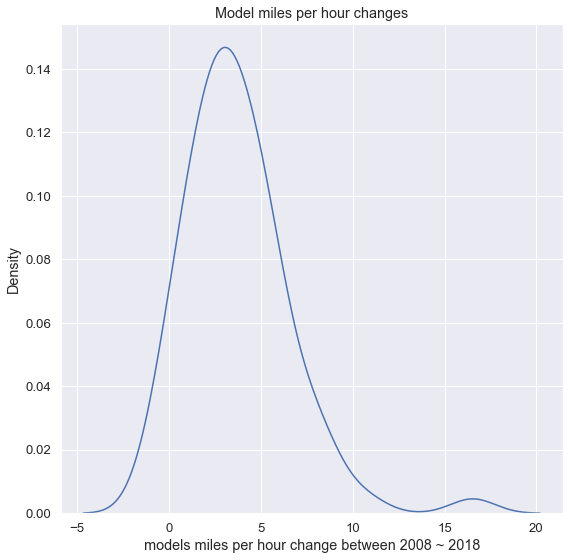

In [48]:
sns.kdeplot(x='mpg_change',data=model_mpg)
plt.xlabel("models miles per hour change between 2008 ~ 2018")
plt.title("Model miles per hour changes")

In [45]:
model_mpg[ model_mpg['mpg_change'] == model_mpg['mpg_change'].max()]

,cmb_mpg_2008,cmb_mpg_2018,mpg_change
model,,,
VOLVO XC 90,15.666667,32.2,16.533333
